## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("data/StudentsPerformance.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Dataset Information



- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Checking Missing Values

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no null values in dataset

### 3.2 Checking Duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

There are no duplicates in the dataset

### 3.3 Check Data Types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Check the number of unique values of each column

In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Check Statistics

In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### 3.7 Exploring Data

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
## defineing numerical and categorical features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'object']
num_features = [feature for feature in df.columns if df[feature].dtype != 'object']

print('We have {} numerical features : {}'.format(len(num_features),num_features))
print('We have {} categorical features : {}'.format(len(cat_features),cat_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [ ]:
## Print unique values of categorical features
for feature in cat_features:
    print(f"Categories in {feature} column are : {df[feature].unique()}")

Categories in gender column are : ['female' 'male']
Categories in race/ethnicity column are : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education column are : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch column are : ['standard' 'free/reduced']
Categories in test preparation course column are : ['none' 'completed']


In [17]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

### 3.8 Adding columns Total Score and Average
    in place of {'math score', 'reading score', 'writing score'}

In [18]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3

In [19]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [22]:
reading_full = (df['reading score'] == 100).sum()
writing_full = (df['writing score'] == 100).sum()
math_full = (df['math score'] == 100).sum()

print(f'No. of students with full marks in Maths : {math_full}')
print(f'No. of students with full marks in Writing: {writing_full}')
print(f'No. of students with full marks in Reading: {reading_full}')

No. of students with full marks in Maths : 7
No. of students with full marks in Writing: 14
No. of students with full marks in Reading: 17


In [23]:
reading_full = (df['reading score'] <= 20).sum()
writing_full = (df['writing score'] <= 20).sum()
math_full = (df['math score'] <= 20).sum()

print(f'No. of students with less than 20 marks in Maths : {math_full}')
print(f'No. of students with less than 20 marks in Writing: {writing_full}')
print(f'No. of students with less than 20 marks in Reading: {reading_full}')

No. of students with less than 20 marks in Maths : 4
No. of students with less than 20 marks in Writing: 3
No. of students with less than 20 marks in Reading: 1


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

### Histogram & KDE

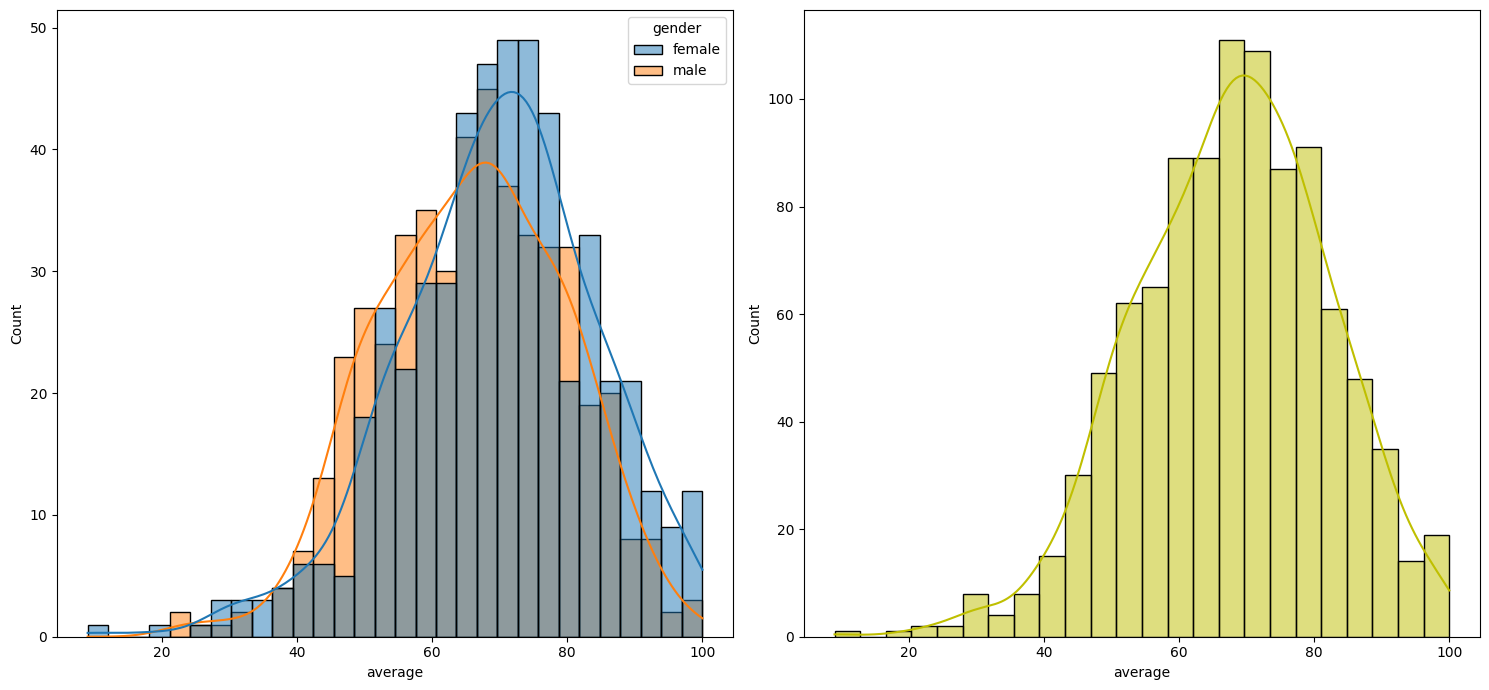

In [33]:
fig , axs = plt.subplots(1,2,figsize=(15,7))

sns.histplot(data=df, x='average', bins=30, kde=True, hue='gender',ax=axs[0])
sns.histplot(data=df, x='average', kde=True, color='y',ax=axs[1])

plt.tight_layout()
plt.show()

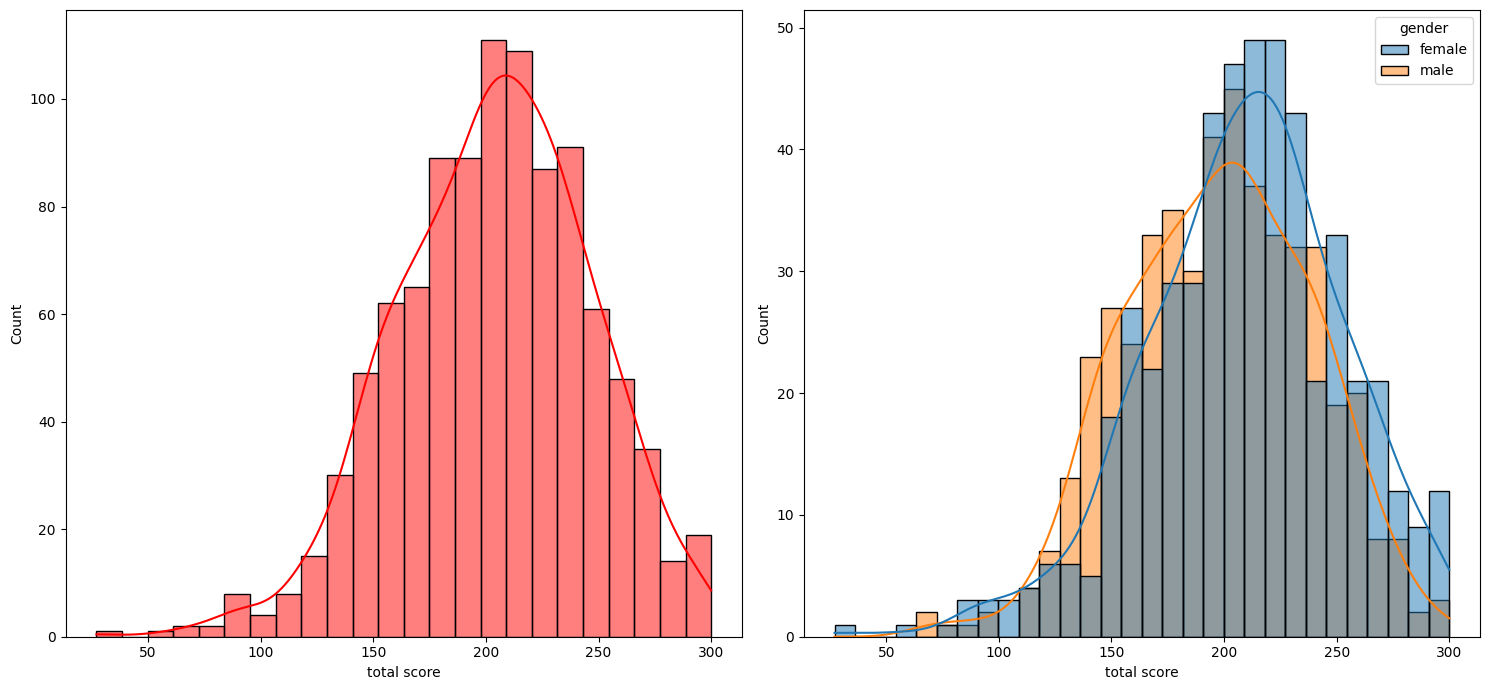

In [31]:
fig , axs = plt.subplots(1,2,figsize=(15,7))

sns.histplot(data=df, x='total score', bins=30, kde=True, hue='gender',ax=axs[1])
sns.histplot(data=df, x='total score', kde=True, color='r',ax=axs[0])

plt.tight_layout()
plt.show()

#####  Insights
- Female students tend to perform well then male students.

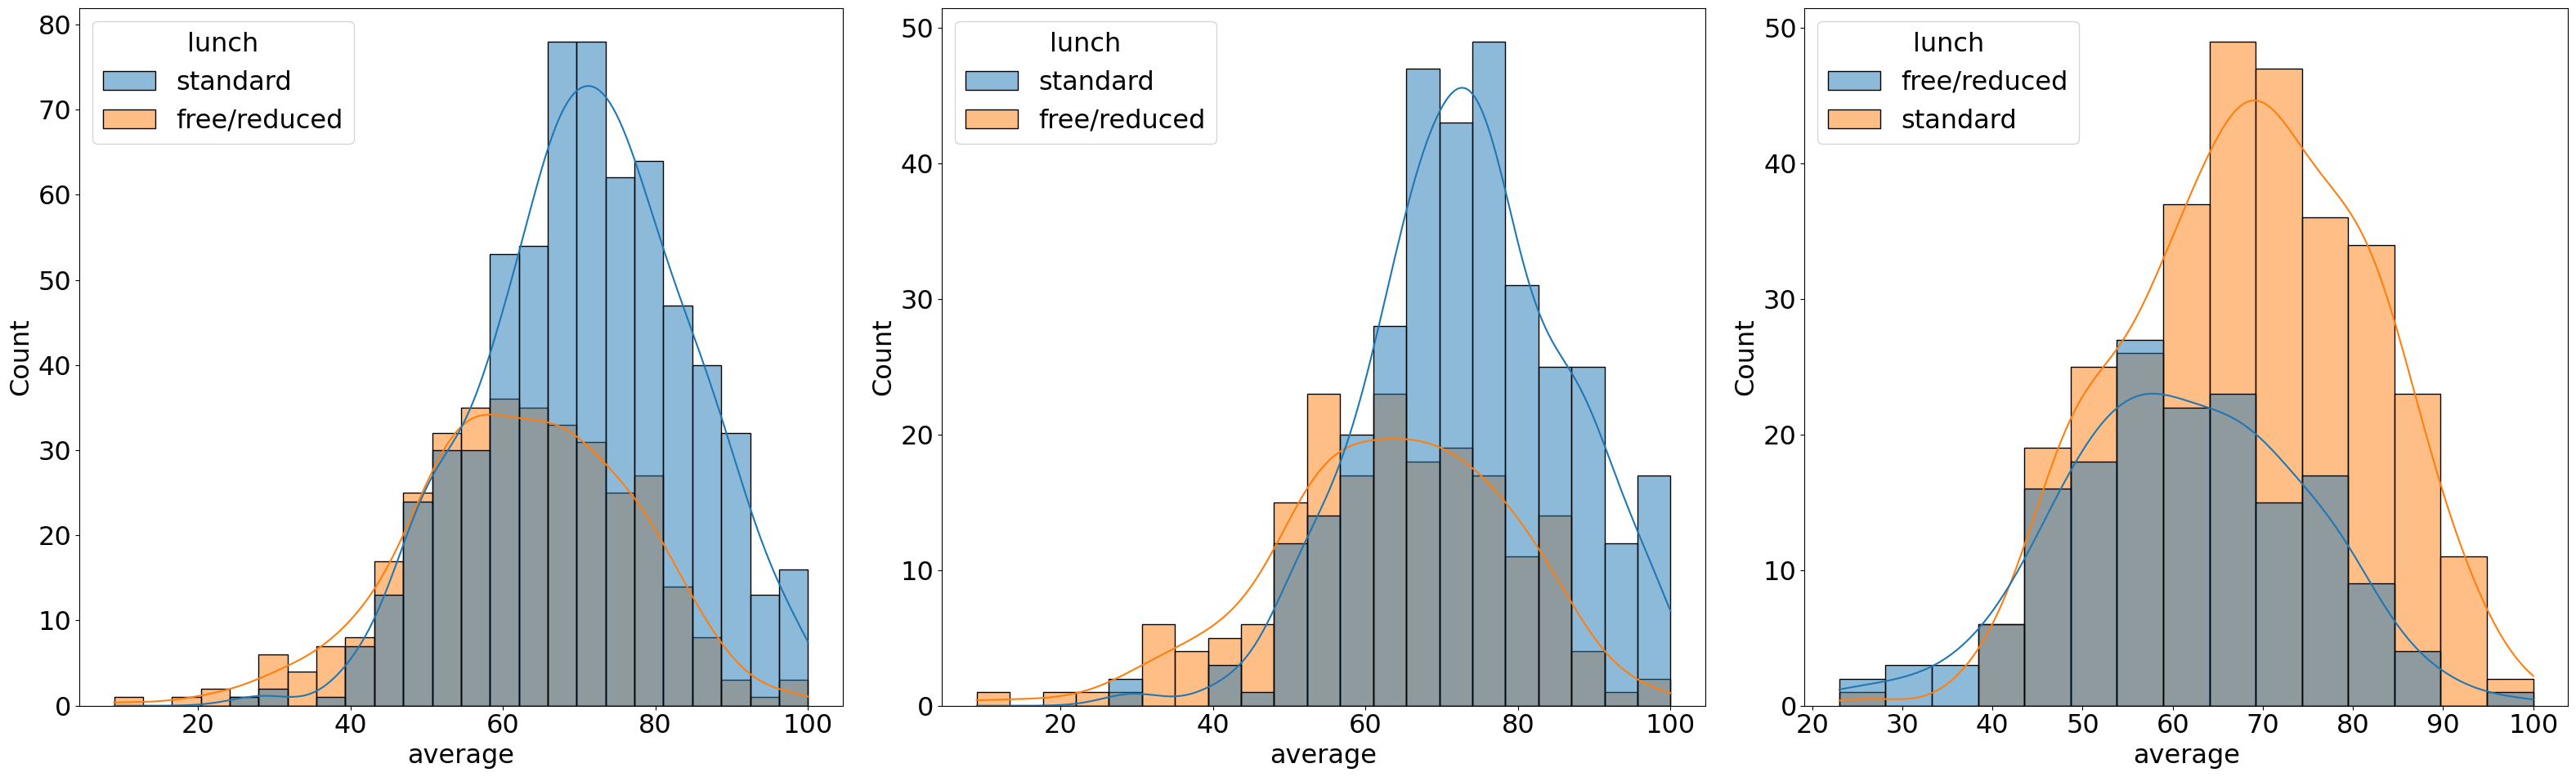

In [42]:
fig , axs = plt.subplots(1,3,figsize=(32,10))

sns.histplot(data=df, x='average', kde=True, hue='lunch',ax=axs[0])
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch',ax=axs[1])
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch',ax=axs[2])

plt.rcParams['font.size'] = 23
plt.tight_layout()
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

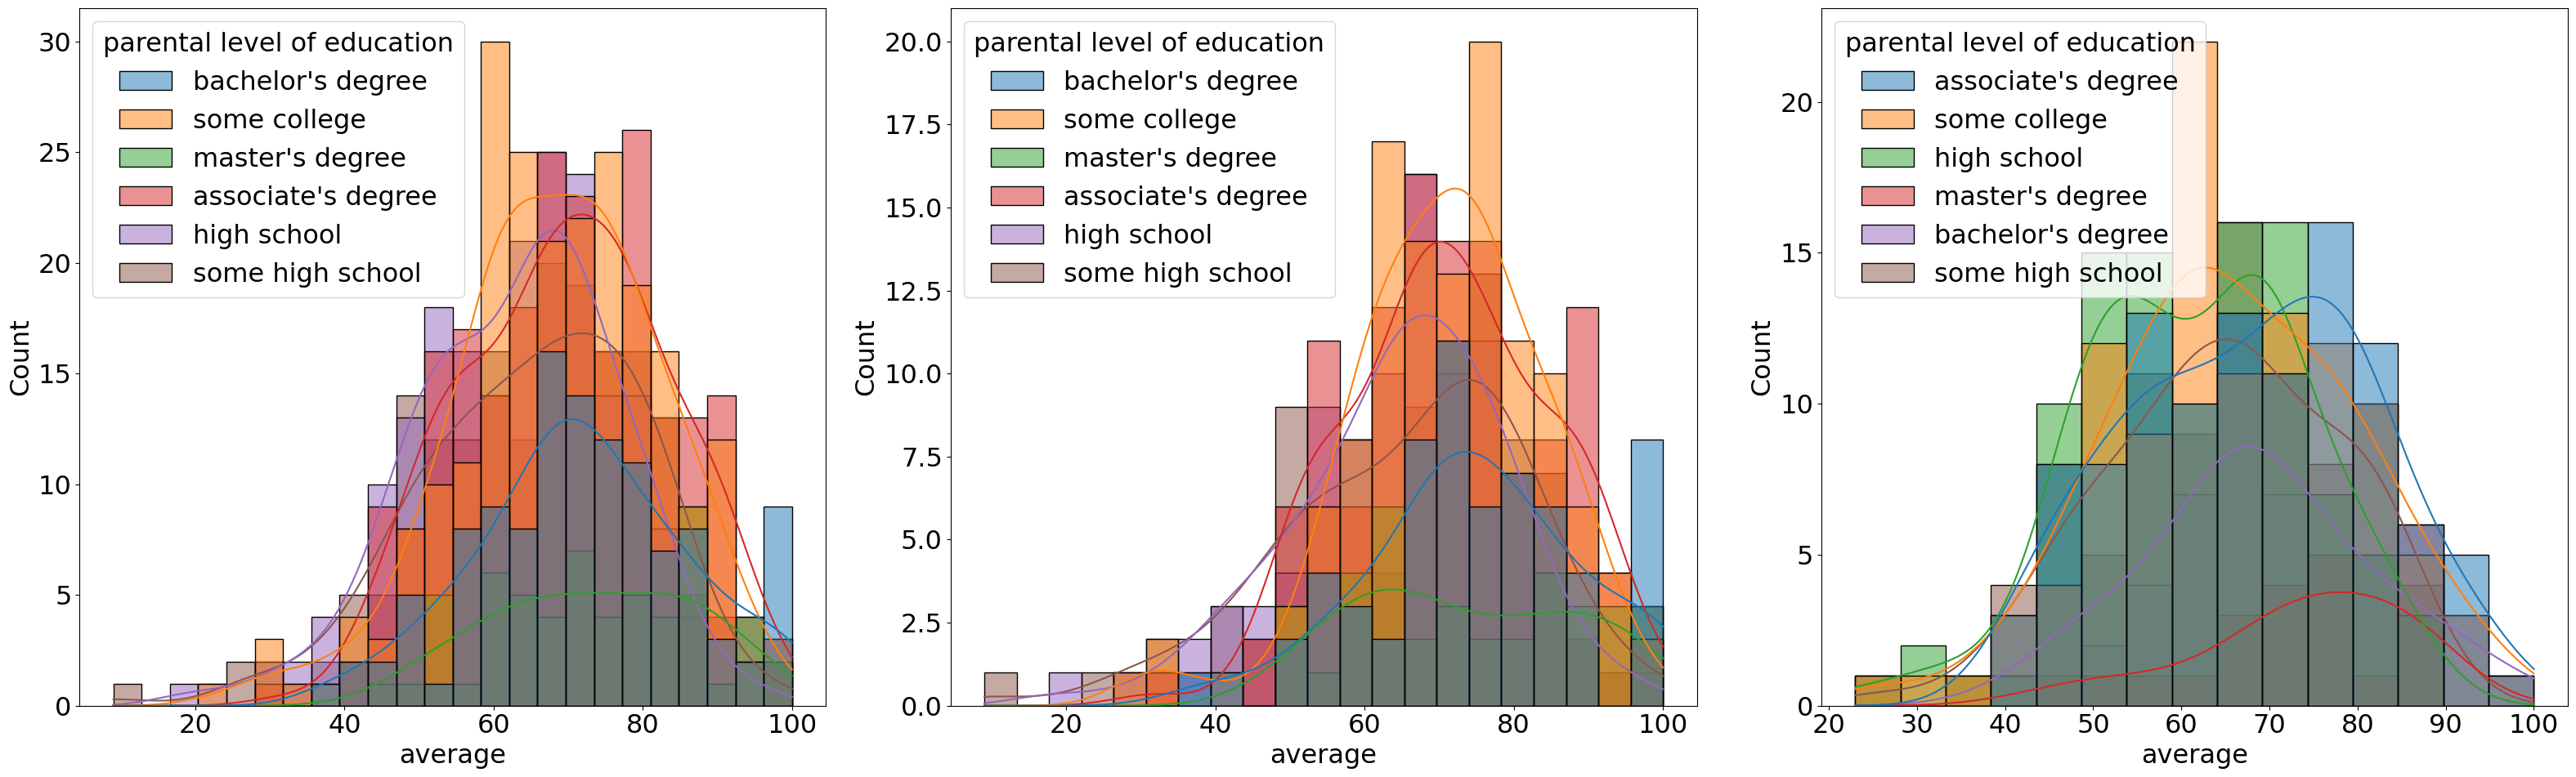

In [44]:
fig , axs = plt.subplots(1,3,figsize=(32,10))

sns.histplot(data=df, x='average', kde=True, hue='parental level of education',ax=axs[0])
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental level of education',ax=axs[1])
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental level of education',ax=axs[2])

plt.rcParams['font.size'] = 23
plt.tight_layout()
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

In [45]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


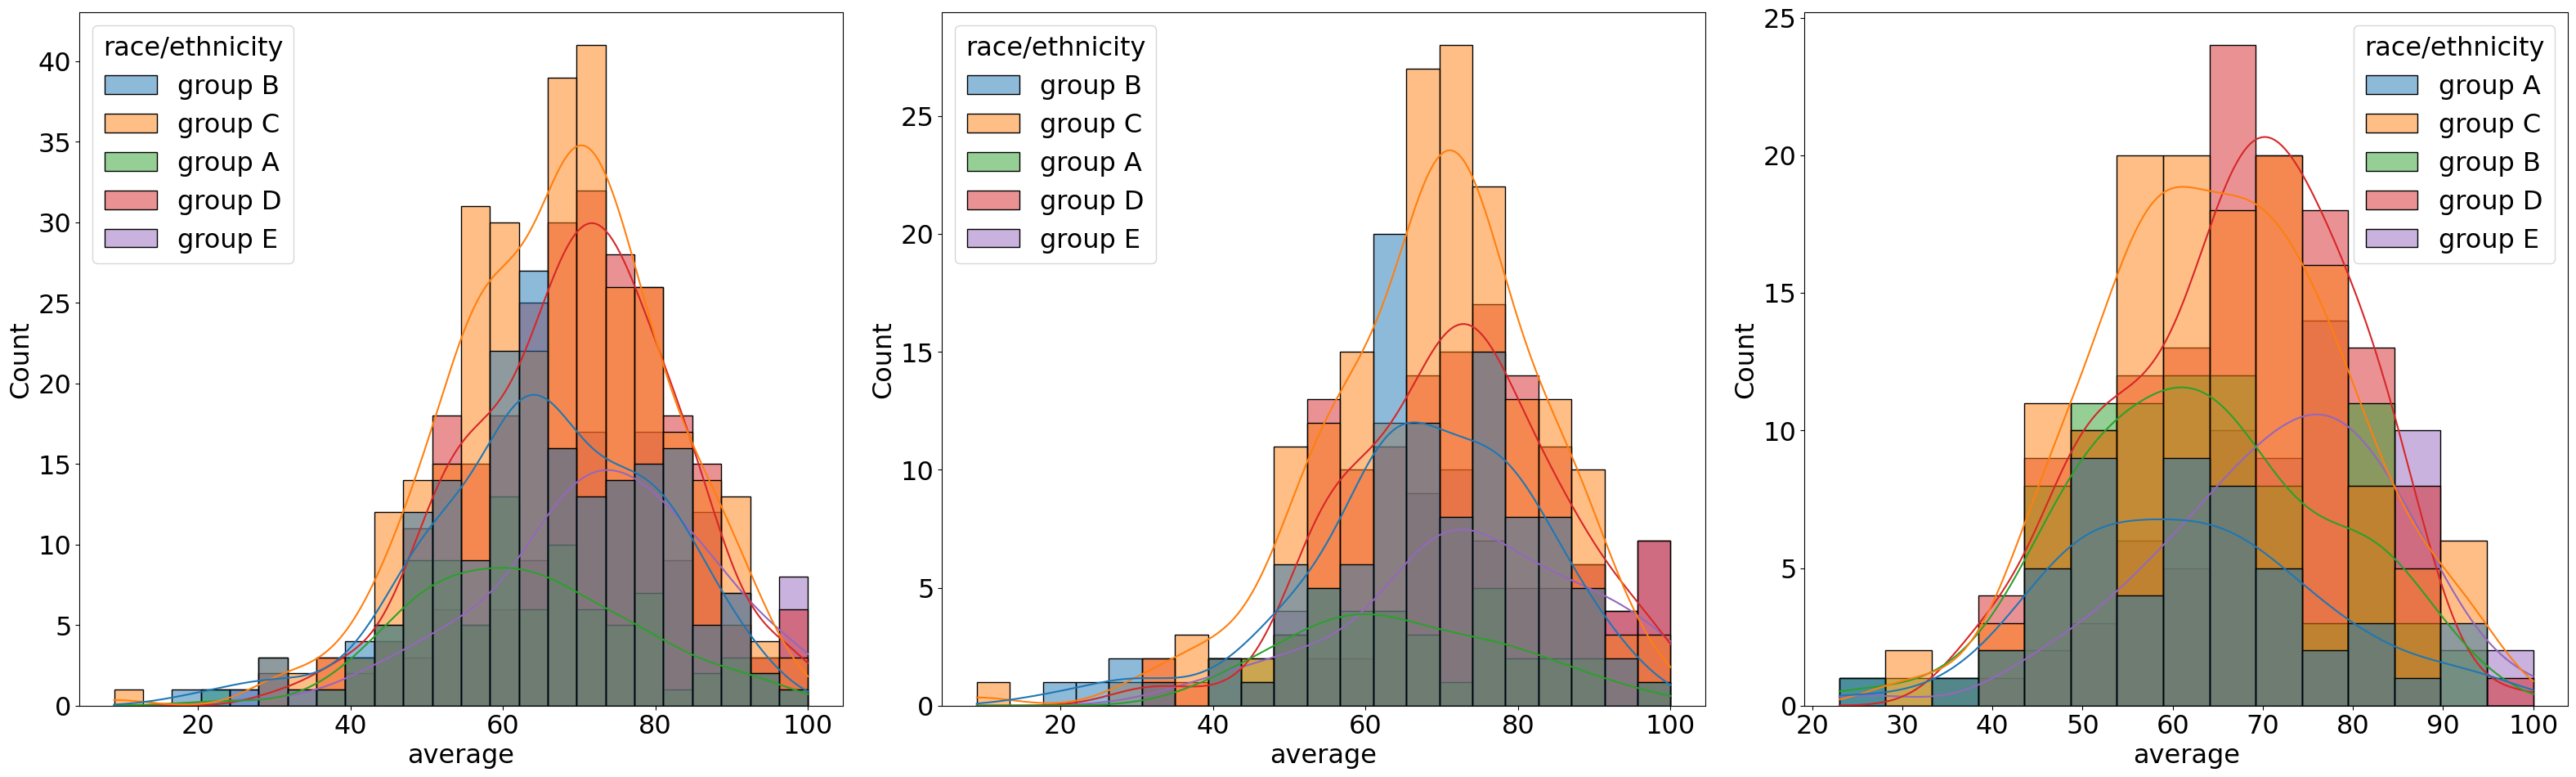

In [46]:
fig , axs = plt.subplots(1,3,figsize=(32,10))

sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity',ax=axs[0])
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race/ethnicity',ax=axs[1])
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race/ethnicity',ax=axs[2])

plt.rcParams['font.size'] = 23
plt.tight_layout()
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

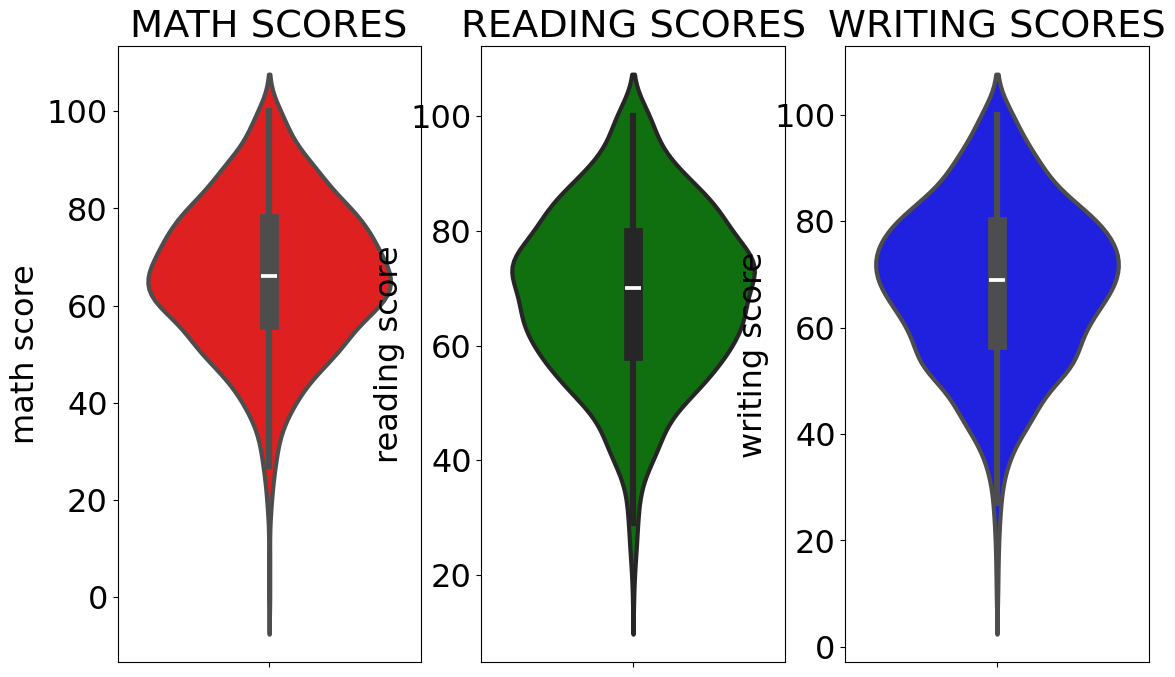

In [47]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

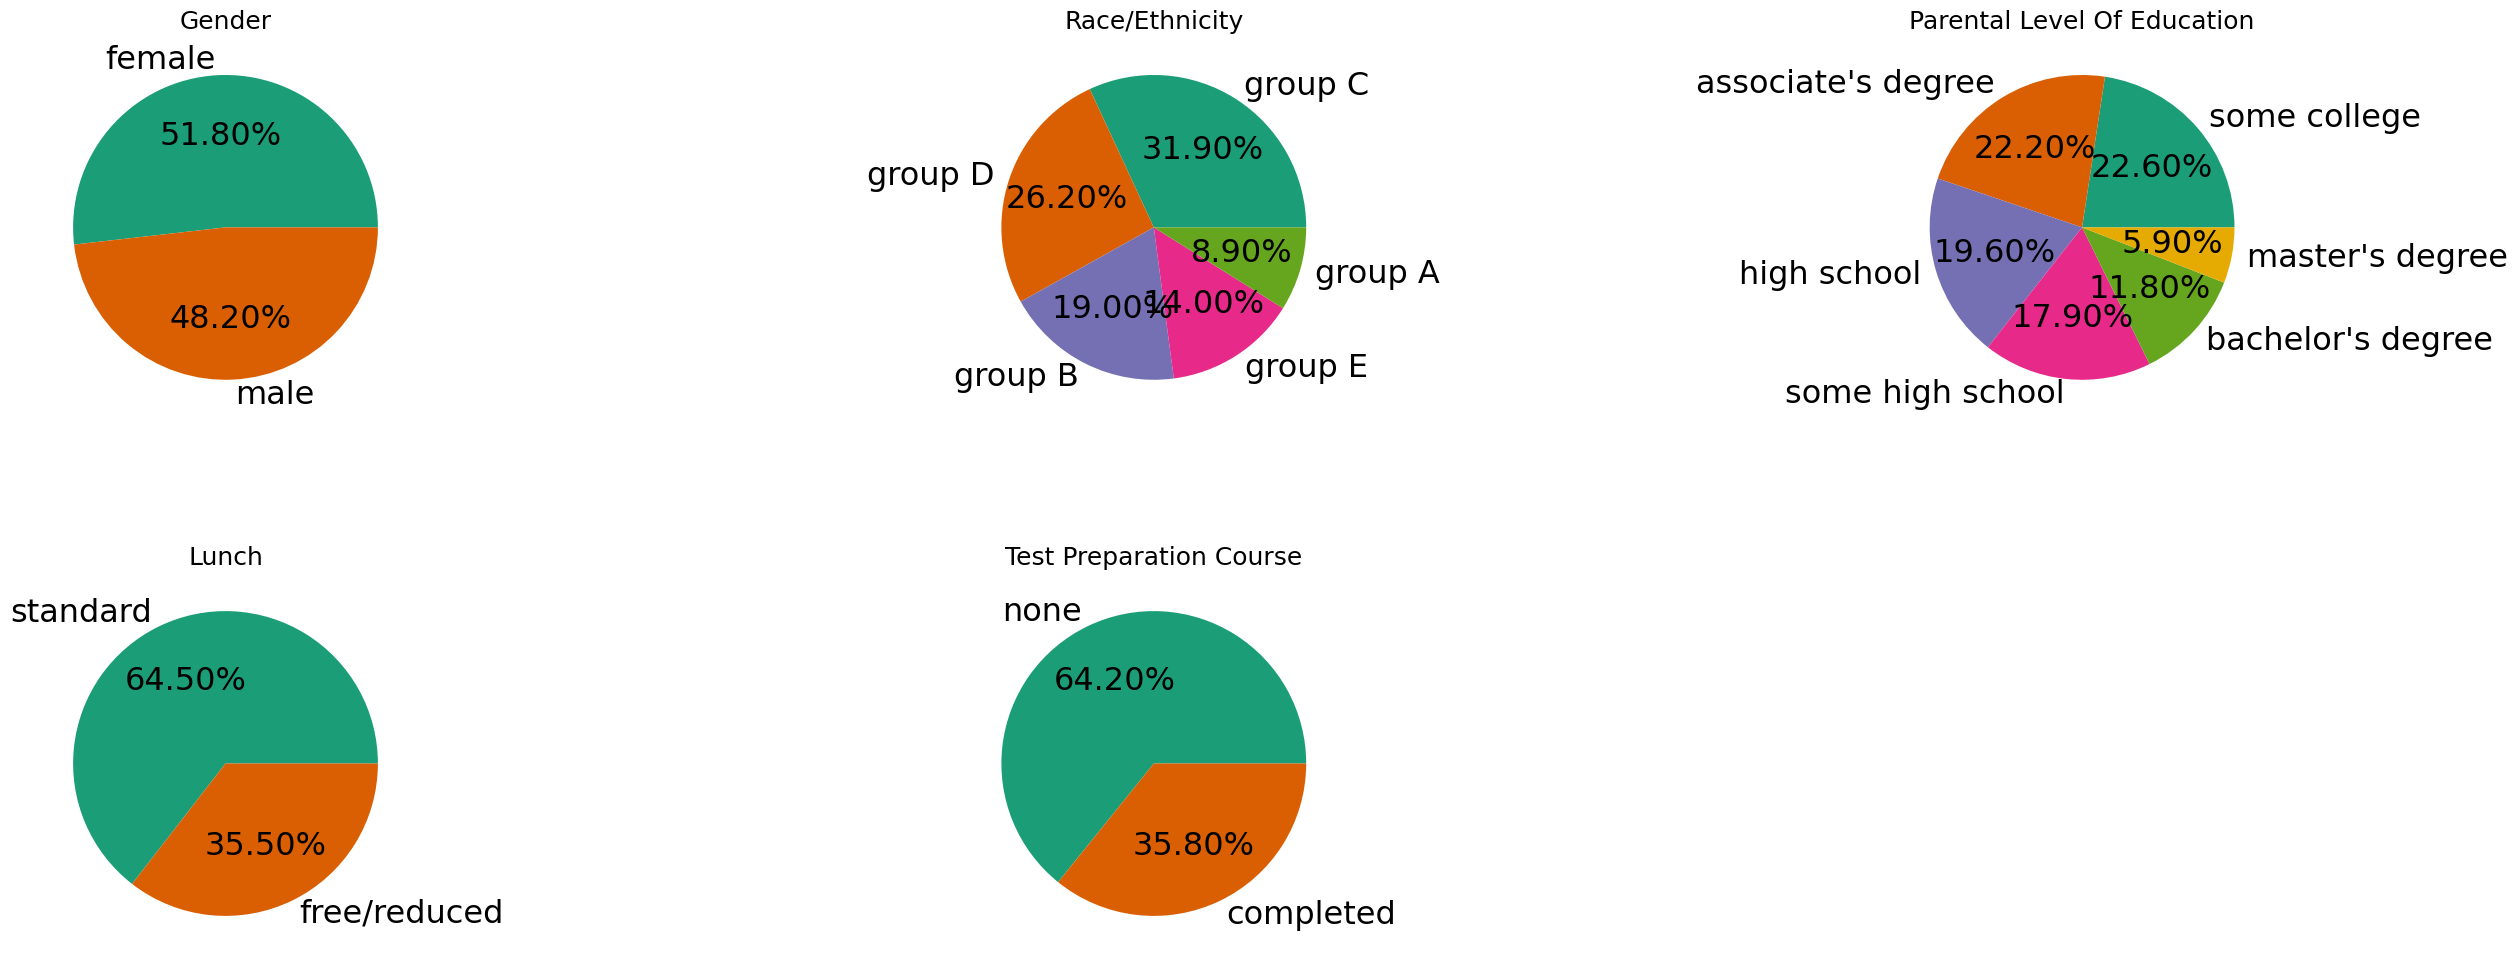

In [54]:
plt.figure(figsize=(30, 12))

for i, col in enumerate(cat_features, 1):
    plt.subplot(2, 3, i)

    size = df[col].value_counts()
    labels = size.index      # auto labels
    colors = plt.cm.Dark2(range(len(size)))   # auto colors

    plt.pie(size, labels=labels, autopct='%0.2f%%', colors=colors)
    plt.title(col.title(), fontsize=18)
    plt.axis('off')

plt.tight_layout(pad=4.0)
plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

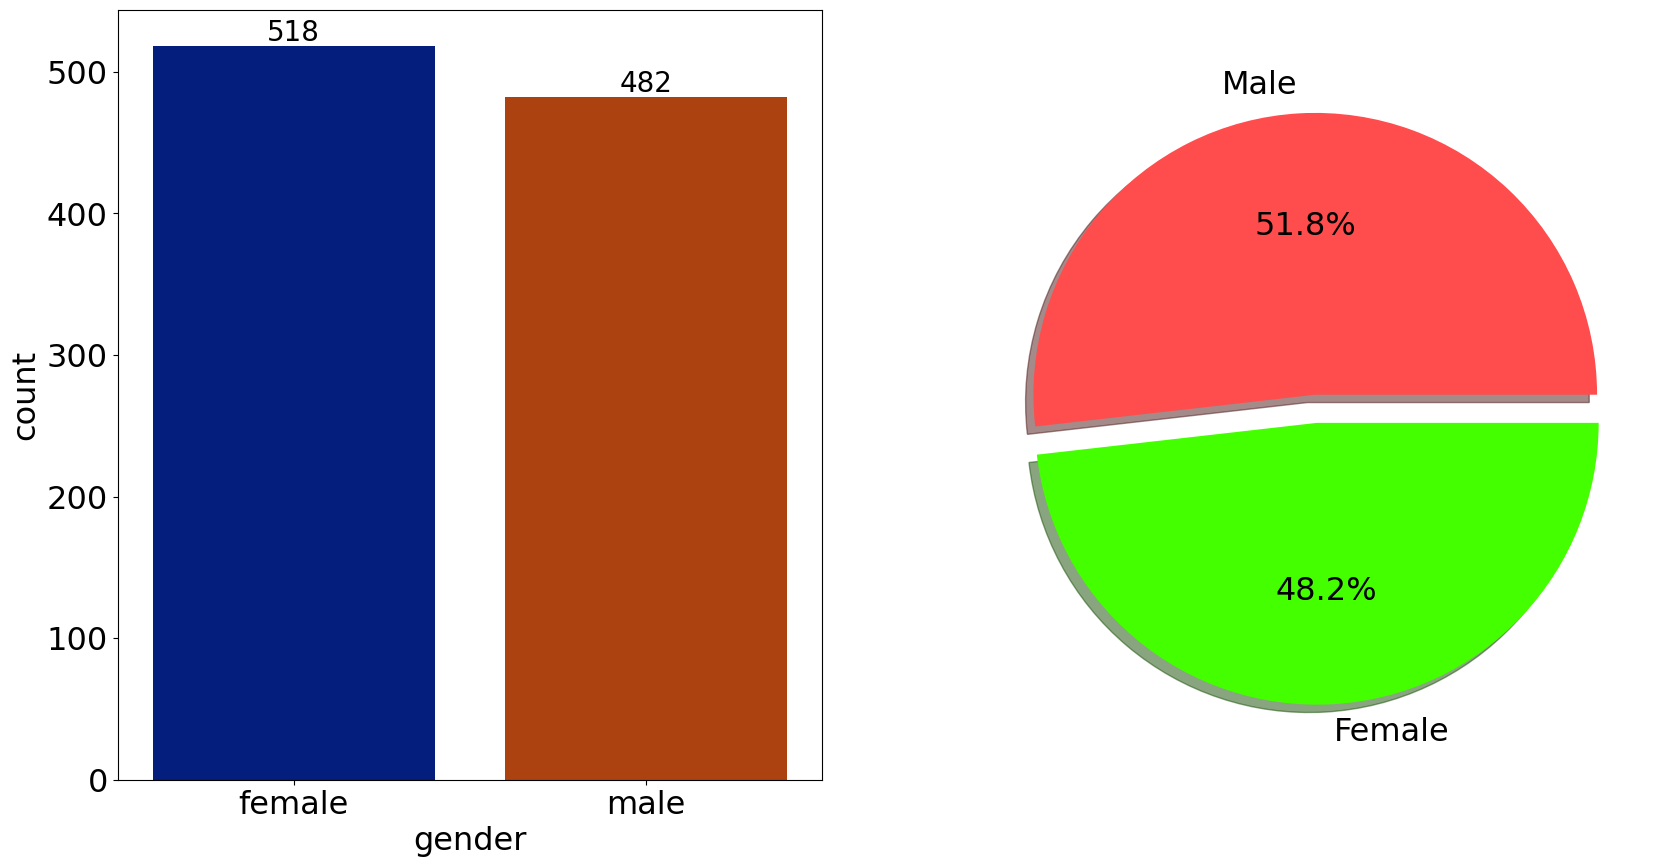

In [57]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='dark',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d',"#44ff00"])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

## Checking Outliers

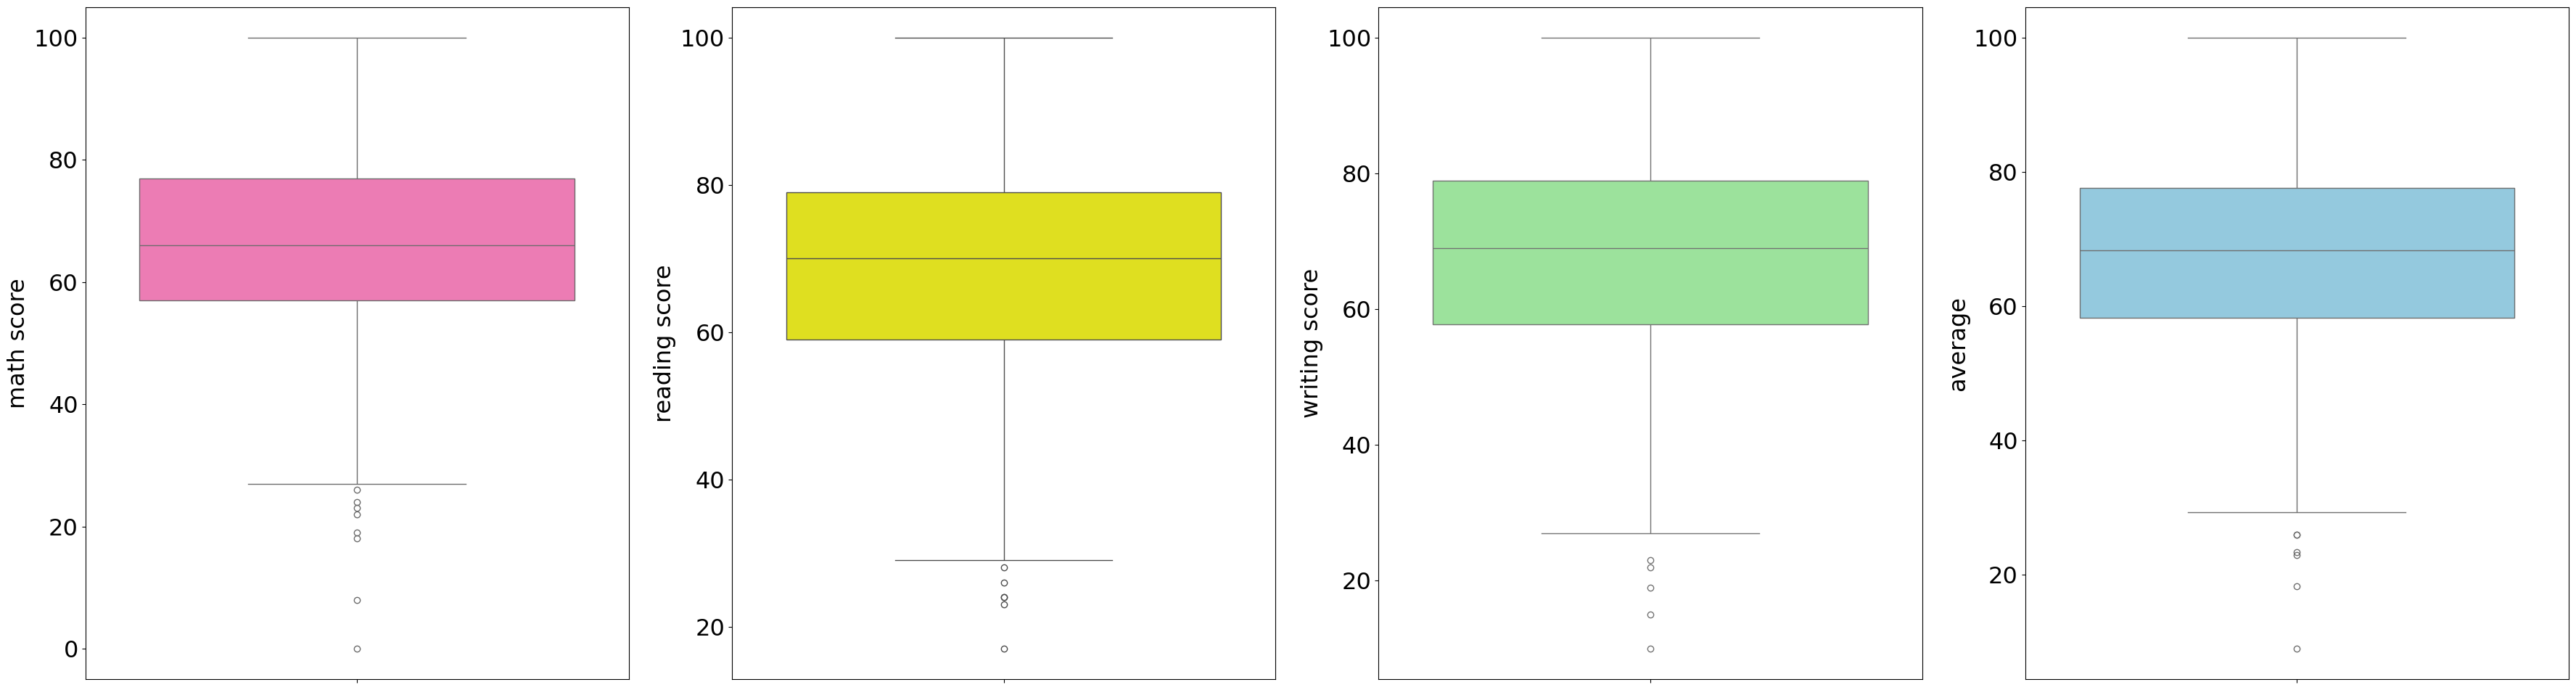

In [69]:
f,ax=plt.subplots(1,4,figsize=(36,10))

sns.boxplot(df['math score'],color='hotpink',ax=ax[0])
sns.boxplot(df['reading score'],color='yellow',ax=ax[1])
sns.boxplot(df['writing score'],color='lightgreen',ax=ax[2])
sns.boxplot(df['average'],color='skyblue',ax=ax[3])

plt.tight_layout()
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

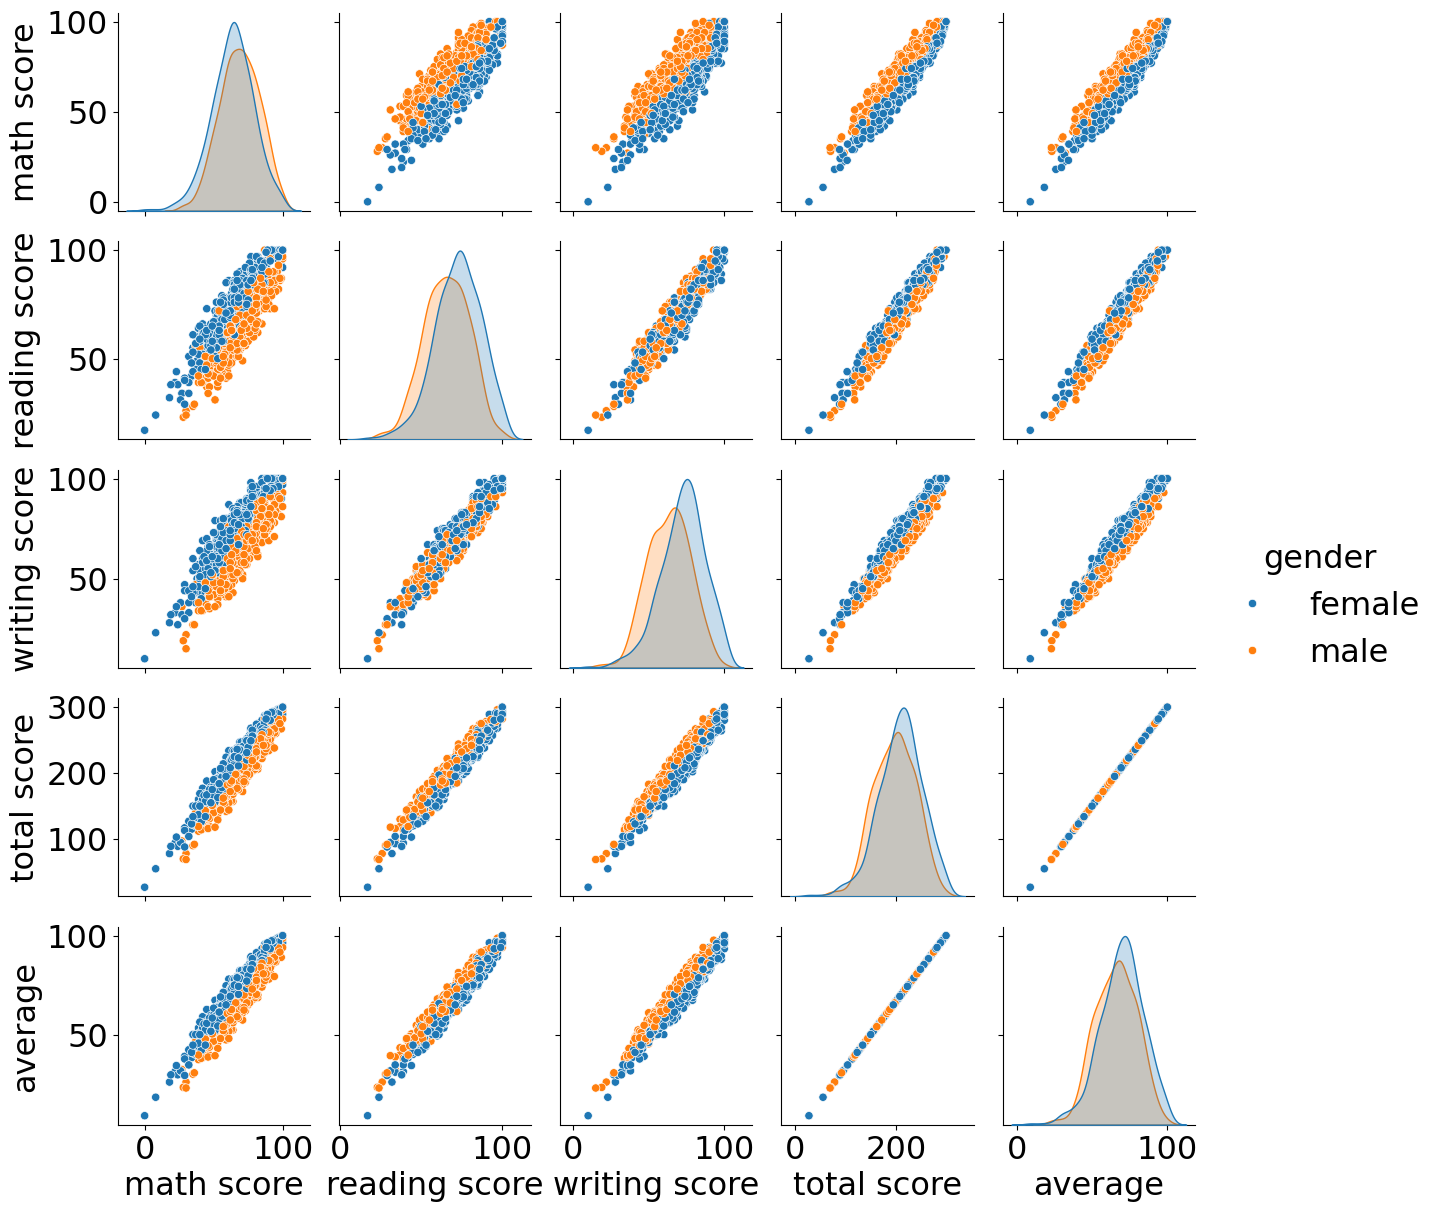

In [70]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.